In [1]:
!pip install plotly

In [2]:
!pip install wordcloud

In [3]:
!pip install xgboost

In [4]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.express as px  
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot 

In [5]:
# Read the CSV file 
rider_provider='CARS.csv'
car_dataframe = pd.read_csv(rider_provider)

In [6]:
car_dataframe.head()

Make           Model   Type Origin DriveTrain     MSRP  Invoice  \
0  Acura             MDX    SUV   Asia        All  $36,945  $33,337   
1  Acura  RSX Type S 2dr  Sedan   Asia      Front  $23,820  $21,761   
2  Acura         TSX 4dr  Sedan   Asia      Front  $26,990  $24,647   
3  Acura          TL 4dr  Sedan   Asia      Front  $33,195  $30,299   
4  Acura      3.5 RL 4dr  Sedan   Asia      Front  $43,755  $39,014   

   EngineSize  Cylinders  Horsepower  MPG_City  MPG_Highway  Weight  \
0         3.5        6.0         265        17           23    4451   
1         2.0        4.0         200        24           31    2778   
2         2.4        4.0         200        22           29    3230   
3         3.2        6.0         270        20           28    3575   
4         3.5        6.0         225        18           24    3880   

   Wheelbase  Length  
0        106     189  
1        101     172  
2        105     183  
3        108     186  
4        115     197

In [7]:
#analysing top and bottom 10 section of the bataset to understand the dataset
print('#top 10 \n')
car_dataframe.head(10)


#top 10 



Make                    Model    Type  Origin DriveTrain     MSRP  \
0  Acura                      MDX     SUV    Asia        All  $36,945   
1  Acura           RSX Type S 2dr   Sedan    Asia      Front  $23,820   
2  Acura                  TSX 4dr   Sedan    Asia      Front  $26,990   
3  Acura                   TL 4dr   Sedan    Asia      Front  $33,195   
4  Acura               3.5 RL 4dr   Sedan    Asia      Front  $43,755   
5  Acura  3.5 RL w/Navigation 4dr   Sedan    Asia      Front  $46,100   
6  Acura   NSX coupe 2dr manual S  Sports    Asia       Rear  $89,765   
7   Audi              A4 1.8T 4dr   Sedan  Europe      Front  $25,940   
8   Audi   A41.8T convertible 2dr   Sedan  Europe      Front  $35,940   
9   Audi               A4 3.0 4dr   Sedan  Europe      Front  $31,840   

   Invoice  EngineSize  Cylinders  Horsepower  MPG_City  MPG_Highway  Weight  \
0  $33,337         3.5        6.0         265        17           23    4451   
1  $21,761         2.0        4.0         200        24           31    2778   
2  $24,647         2.4        4.0         200        22           29    3230   
3  $30,299         3.2        6.0         270        20           28    3575   
4  $39,014         3.5        6.0         225        18           24    3880   
5  $41,100         3.5        6.0         225        18           24    3893   
6  $79,978         3.2        6.0         290        17           24    3153   
7  $23,508         1.8        4.0         170        22           31    3252   
8  $32,506         1.8        4.0         170        23           30    3638   
9  $28,846         3.0        6.0         220        20           28    3462   

   Wheelbase  Length  
0        106     189  
1        101     172  
2        105     183  
3        108     186  
4        115     197  
5        115     197  
6        100     174  
7        104     179  
8        105     180  
9        104     179

In [8]:
print('\n #bottom 10 \n')
car_dataframe.tail(10)


 #bottom 10 



Make                    Model   Type  Origin DriveTrain     MSRP  \
418  Volvo              S60 2.5 4dr  Sedan  Europe        All  $31,745   
419  Volvo               S60 T5 4dr  Sedan  Europe      Front  $34,845   
420  Volvo                S60 R 4dr  Sedan  Europe        All  $37,560   
421  Volvo              S80 2.9 4dr  Sedan  Europe      Front  $37,730   
422  Volvo             S80 2.5T 4dr  Sedan  Europe        All  $37,885   
423  Volvo  C70 LPT convertible 2dr  Sedan  Europe      Front  $40,565   
424  Volvo  C70 HPT convertible 2dr  Sedan  Europe      Front  $42,565   
425  Volvo               S80 T6 4dr  Sedan  Europe      Front  $45,210   
426  Volvo                      V40  Wagon  Europe      Front  $26,135   
427  Volvo                     XC70  Wagon  Europe        All  $35,145   

     Invoice  EngineSize  Cylinders  Horsepower  MPG_City  MPG_Highway  \
418  $29,916         2.5        5.0         208        20           27   
419  $32,902         2.3        5.0         247        20           28   
420  $35,382         2.5        5.0         300        18           25   
421  $35,542         2.9        6.0         208        20           28   
422  $35,688         2.5        5.0         194        20           27   
423  $38,203         2.4        5.0         197        21           28   
424  $40,083         2.3        5.0         242        20           26   
425  $42,573         2.9        6.0         268        19           26   
426  $24,641         1.9        4.0         170        22           29   
427  $33,112         2.5        5.0         208        20           27   

     Weight  Wheelbase  Length  
418    3903        107     180  
419    3766        107     180  
420    3571        107     181  
421    3576        110     190  
422    3691        110     190  
423    3450        105     186  
424    3450        105     186  
425    3653        110     190  
426    2822        101     180  
427    3823        109     186

In [9]:
#getting all the heading to understand what input we must take from user and not to
car_dataframe.columns

Index(['Make', 'Model', 'Type', 'Origin', 'DriveTrain', 'MSRP', 'Invoice',
       'EngineSize', 'Cylinders', 'Horsepower', 'MPG_City', 'MPG_Highway',
       'Weight', 'Wheelbase', 'Length'],
      dtype='object')

In [10]:
#understanding the shape of the dataset
car_dataframe.shape

(428, 15)

In [11]:
#checking the null values in the dataset
car_dataframe.isnull().sum()

Make           0
Model          0
Type           0
Origin         0
DriveTrain     0
MSRP           0
Invoice        0
EngineSize     0
Cylinders      2
Horsepower     0
MPG_City       0
MPG_Highway    0
Weight         0
Wheelbase      0
Length         0
dtype: int64

In [12]:
#thus there are two null enteries in the Cylinder feature of the car, so lets remove it
car_dataframe = car_dataframe.dropna()

In [13]:
#confirmation
car_dataframe.isnull().sum()

Make           0
Model          0
Type           0
Origin         0
DriveTrain     0
MSRP           0
Invoice        0
EngineSize     0
Cylinders      0
Horsepower     0
MPG_City       0
MPG_Highway    0
Weight         0
Wheelbase      0
Length         0
dtype: int64

In [14]:
#obtaining all the information of the columns used in datasets
car_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 426 entries, 0 to 427
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         426 non-null    object 
 1   Model        426 non-null    object 
 2   Type         426 non-null    object 
 3   Origin       426 non-null    object 
 4   DriveTrain   426 non-null    object 
 5   MSRP         426 non-null    object 
 6   Invoice      426 non-null    object 
 7   EngineSize   426 non-null    float64
 8   Cylinders    426 non-null    float64
 9   Horsepower   426 non-null    int64  
 10  MPG_City     426 non-null    int64  
 11  MPG_Highway  426 non-null    int64  
 12  Weight       426 non-null    int64  
 13  Wheelbase    426 non-null    int64  
 14  Length       426 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 53.2+ KB


In [15]:
#removing currency sign and other unrequired signs from price related columms and converting it to integer form
car_dataframe["MSRP"] = car_dataframe["MSRP"].str.replace("$", "")
car_dataframe["MSRP"] = car_dataframe["MSRP"].str.replace(",", "")
car_dataframe["MSRP"] = car_dataframe["MSRP"].astype(int)


In [16]:
car_dataframe["Invoice"] = car_dataframe["Invoice"].str.replace("$", "")
car_dataframe["Invoice"] = car_dataframe["Invoice"].str.replace(",", "")
car_dataframe["Invoice"] = car_dataframe["Invoice"].astype(int)

In [17]:
car_dataframe.head()

Make           Model   Type Origin DriveTrain   MSRP  Invoice  EngineSize  \
0  Acura             MDX    SUV   Asia        All  36945    33337         3.5   
1  Acura  RSX Type S 2dr  Sedan   Asia      Front  23820    21761         2.0   
2  Acura         TSX 4dr  Sedan   Asia      Front  26990    24647         2.4   
3  Acura          TL 4dr  Sedan   Asia      Front  33195    30299         3.2   
4  Acura      3.5 RL 4dr  Sedan   Asia      Front  43755    39014         3.5   

   Cylinders  Horsepower  MPG_City  MPG_Highway  Weight  Wheelbase  Length  
0        6.0         265        17           23    4451        106     189  
1        4.0         200        24           31    2778        101     172  
2        4.0         200        22           29    3230        105     183  
3        6.0         270        20           28    3575        108     186  
4        6.0         225        18           24    3880        115     197

In [18]:
#checking maximum and minimum MSRP of the cars
print("maximum MSRP is : ",car_dataframe.MSRP.max())
print("minimum MSRP is : ",car_dataframe.MSRP.min())

maximum MSRP is :  192465
minimum MSRP is :  10280


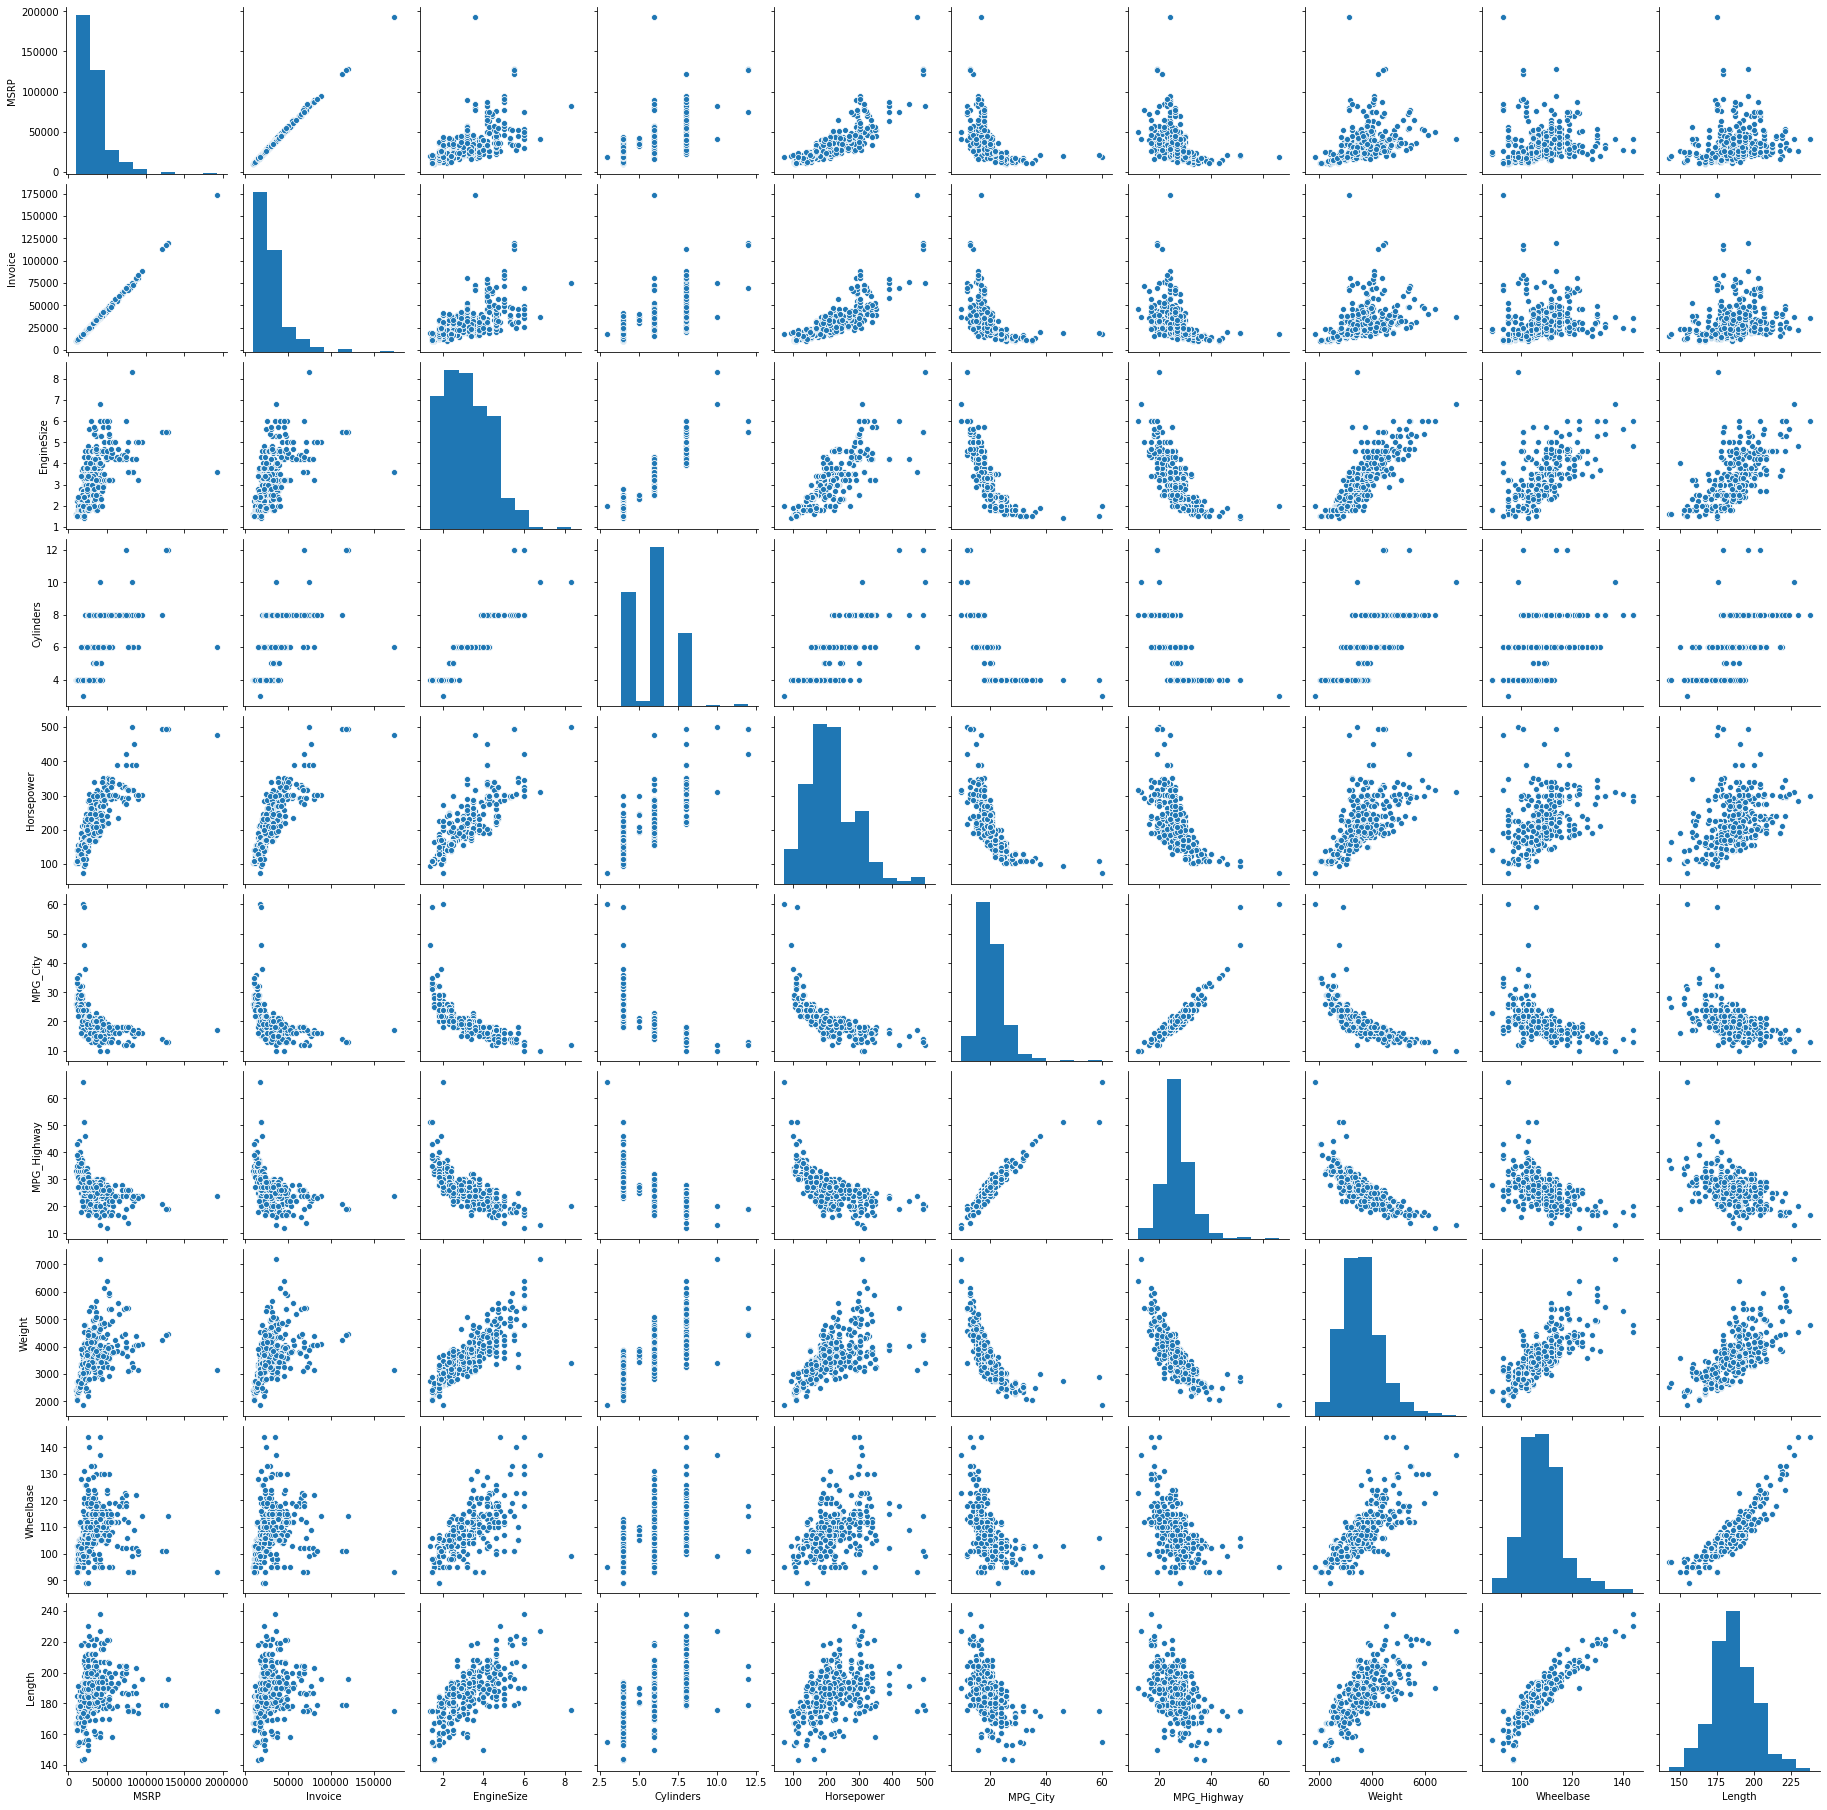

In [19]:
#plotting a scatter plot for univarient distribution
sns.pairplot( data = car_dataframe)

In [20]:
# companies manufacturing cars are
car_dataframe.Make.unique()

array(['Acura', 'Audi', 'BMW', 'Buick', 'Cadillac', 'Chevrolet',
       'Chrysler', 'Dodge', 'Ford', 'GMC', 'Honda', 'Hummer', 'Hyundai',
       'Infiniti', 'Isuzu', 'Jaguar', 'Jeep', 'Kia', 'Land Rover',
       'Lexus', 'Lincoln', 'MINI', 'Mazda', 'Mercedes-Benz', 'Mercury',
       'Mitsubishi', 'Nissan', 'Oldsmobile', 'Pontiac', 'Porsche', 'Saab',
       'Saturn', 'Scion', 'Subaru', 'Suzuki', 'Toyota', 'Volkswagen',
       'Volvo'], dtype=object)

In [21]:
#ploting histogram to analyse how many cars are manufactured by makers in dataset 
fig = px.histogram(car_dataframe, x = "Make",
                  labels = {"Make":"Manufacturer"},
                  title = "MAKE OF THE CAR",
                  color_discrete_sequence = ["RED"])
                  
fig.show()

In [22]:
# taking a look on various types of the cars
car_dataframe.Type.unique()

array(['SUV', 'Sedan', 'Sports', 'Wagon', 'Truck', 'Hybrid'], dtype=object)

In [23]:
#plotting a histogram to get the amount of types of cars present
fig = px.histogram(car_dataframe, x = "Type",
                  labels = {"Type":"Type"},
                  title = "TYPE OF THE CAR",
                  color_discrete_sequence = ["green"])
                  
fig.show()

In [60]:
# Let's plot the location
car_dataframe.Origin.unique()

array(['Asia', 'Europe', 'USA'], dtype=object)

In [61]:
fig = px.histogram(car_dataframe, x = "Origin",
                  labels = {"Origin":"Origin"},
                  title = "LOCATION OF THE CAR SALES",
                  color_discrete_sequence = ["brown"])
                  
fig.show()

In [62]:
# Let's view the drivetrain of the cars
car_dataframe.DriveTrain.unique()

array(['All', 'Front', 'Rear'], dtype=object)

In [63]:
fig = px.histogram(car_dataframe, x = "DriveTrain",
                  labels = {"DriveTrain":"Drivetrain"},
                  title = "DRIVETRAIN OF THE CAR",
                  color_discrete_sequence = ["purple"])
                  
fig.show()

In [64]:
# Ploting making of the car by origin
fig = px.histogram(car_dataframe, x = "Make",
                  color = "Origin",
                  labels = {"Make":"Manufacturer"},
                  title = "MAKE OF THE CAR Vs LOCATION")
                  
fig.show()

In [65]:
fig = px.histogram(car_dataframe, x = "Make",
                  color = "Type",
                  labels = {"Make":"Manufacturer"},
                  title = "MAKE AND TYPE OF THE CAR",
                  opacity = 1)
                  
fig.show()

In [66]:
# Let's view the model of all used cars using WordCloud generator
from wordcloud import WordCloud, STOPWORDS
car_dataframe

Make                    Model   Type  Origin DriveTrain   MSRP  Invoice  \
0    Acura                      MDX    SUV    Asia        All  36945    33337   
1    Acura           RSX Type S 2dr  Sedan    Asia      Front  23820    21761   
2    Acura                  TSX 4dr  Sedan    Asia      Front  26990    24647   
3    Acura                   TL 4dr  Sedan    Asia      Front  33195    30299   
4    Acura               3.5 RL 4dr  Sedan    Asia      Front  43755    39014   
..     ...                      ...    ...     ...        ...    ...      ...   
423  Volvo  C70 LPT convertible 2dr  Sedan  Europe      Front  40565    38203   
424  Volvo  C70 HPT convertible 2dr  Sedan  Europe      Front  42565    40083   
425  Volvo               S80 T6 4dr  Sedan  Europe      Front  45210    42573   
426  Volvo                      V40  Wagon  Europe      Front  26135    24641   
427  Volvo                     XC70  Wagon  Europe        All  35145    33112   

     EngineSize  Cylinders  Horsepower  MPG_City  MPG_Highway  Weight  \
0           3.5        6.0         265        17           23    4451   
1           2.0        4.0         200        24           31    2778   
2           2.4        4.0         200        22           29    3230   
3           3.2        6.0         270        20           28    3575   
4           3.5        6.0         225        18           24    3880   
..          ...        ...         ...       ...          ...     ...   
423         2.4        5.0         197        21           28    3450   
424         2.3        5.0         242        20           26    3450   
425         2.9        6.0         268        19           26    3653   
426         1.9        4.0         170        22           29    2822   
427         2.5        5.0         208        20           27    3823   

     Wheelbase  Length  
0          106     189  
1          101     172  
2          105     183  
3          108     186  
4          115     197  
..         ...     ...  
423        105     186  
424        105     186  
425        110     190  
426        101     180  
427        109     186  

[426 rows x 15 columns]

In [67]:
all_the_text = car_dataframe.Model.values

In [68]:
all_the_text

array(['MDX', 'RSX Type S 2dr', 'TSX 4dr', 'TL 4dr', '3.5 RL 4dr',
       '3.5 RL w/Navigation 4dr', 'NSX coupe 2dr manual S', 'A4 1.8T 4dr',
       'A41.8T convertible 2dr', 'A4 3.0 4dr',
       'A4 3.0 Quattro 4dr manual', 'A4 3.0 Quattro 4dr auto',
       'A6 3.0 4dr', 'A6 3.0 Quattro 4dr', 'A4 3.0 convertible 2dr',
       'A4 3.0 Quattro convertible 2dr', 'A6 2.7 Turbo Quattro 4dr',
       'A6 4.2 Quattro 4dr', 'A8 L Quattro 4dr', 'S4 Quattro 4dr',
       'RS 6 4dr', 'TT 1.8 convertible 2dr (coupe)',
       'TT 1.8 Quattro 2dr (convertible)',
       'TT 3.2 coupe 2dr (convertible)', 'A6 3.0 Avant Quattro',
       'S4 Avant Quattro', 'X3 3.0i', 'X5 4.4i', '325i 4dr', '325Ci 2dr',
       '325Ci convertible 2dr', '325xi 4dr', '330i 4dr', '330Ci 2dr',
       '330xi 4dr', '525i 4dr', '330Ci convertible 2dr', '530i 4dr',
       '545iA 4dr', '745i 4dr', '745Li 4dr', 'M3 coupe 2dr',
       'M3 convertible 2dr', 'Z4 convertible 2.5i 2dr',
       'Z4 convertible 3.0i 2dr', '325xi Sport', 'Ra

In [69]:
stopwords = set(STOPWORDS)
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [70]:
someone_you_loved = WordCloud(background_color = "black", max_words = 2000, max_font_size = 100, random_state = 3, 
              stopwords = stopwords, contour_width = 3).generate(str(all_the_text))  

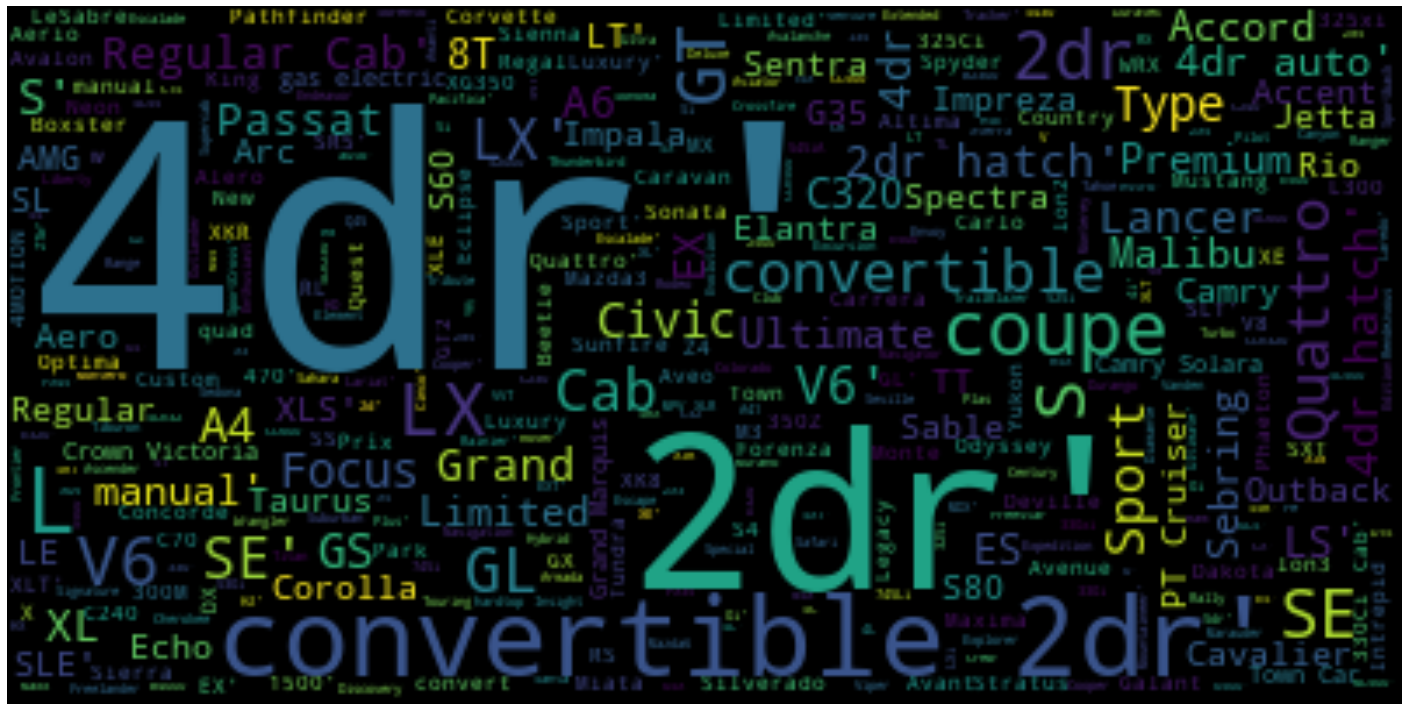

In [71]:
fig = plt.figure(figsize = (25, 15))
plt.imshow(someone_you_loved, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [72]:
car_dataframe.corr()

MSRP   Invoice  EngineSize  Cylinders  Horsepower  MPG_City  \
MSRP         1.000000  0.999132    0.573238   0.649742    0.827296 -0.475916   
Invoice      0.999132  1.000000    0.566019   0.645226    0.824079 -0.471304   
EngineSize   0.573238  0.566019    1.000000   0.908002    0.793250 -0.717860   
Cylinders    0.649742  0.645226    0.908002   1.000000    0.810341 -0.684402   
Horsepower   0.827296  0.824079    0.793250   0.810341    1.000000 -0.677034   
MPG_City    -0.475916 -0.471304   -0.717860  -0.684402   -0.677034  1.000000   
MPG_Highway -0.440523 -0.435452   -0.725901  -0.676100   -0.647425  0.940993   
Weight       0.447987  0.441916    0.808707   0.742209    0.631758 -0.740418   
Wheelbase    0.151665  0.148003    0.638947   0.546730    0.387561 -0.508029   
Length       0.171060  0.165645    0.636015   0.547783    0.382386 -0.504184   

             MPG_Highway    Weight  Wheelbase    Length  
MSRP           -0.440523  0.447987   0.151665  0.171060  
Invoice        -0.435452  0.441916   0.148003  0.165645  
EngineSize     -0.725901  0.808707   0.638947  0.636015  
Cylinders      -0.676100  0.742209   0.546730  0.547783  
Horsepower     -0.647425  0.631758   0.387561  0.382386  
MPG_City        0.940993 -0.740418  -0.508029 -0.504184  
MPG_Highway     1.000000 -0.793615  -0.525457 -0.468756  
Weight         -0.793615  1.000000   0.760857  0.689168  
Wheelbase      -0.525457  0.760857   1.000000  0.889838  
Length         -0.468756  0.689168   0.889838  1.000000

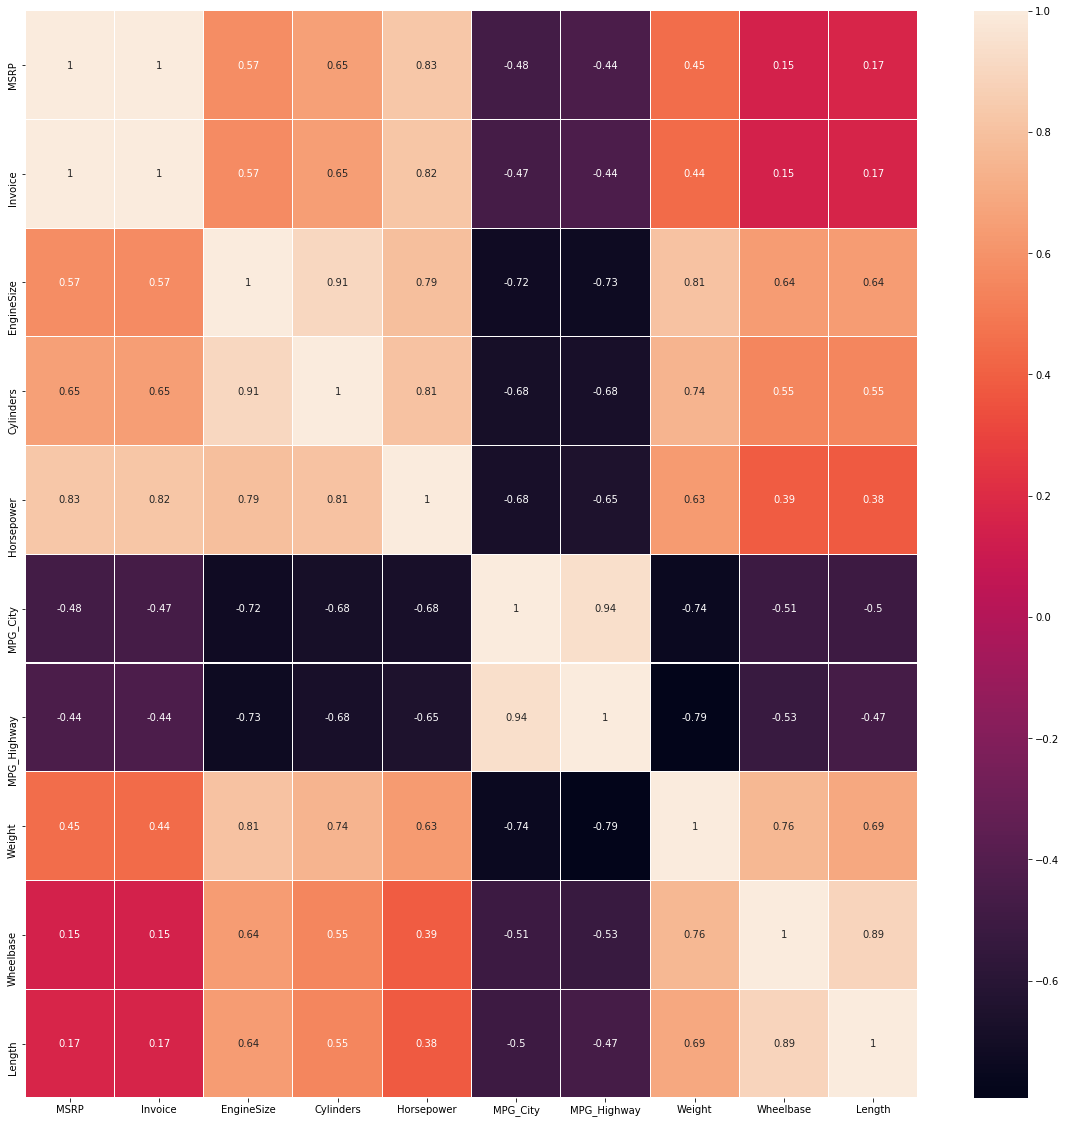

In [73]:
#plotting a heat map to understand the corelation matrix nicely
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(car_dataframe.corr(), annot= True, linewidths=0.1)

In [74]:
# Perform One-Hot Encoding for "Make", "Model", "Type", "Origin", and "DriveTrain"
df_dum = pd.get_dummies(car_dataframe, columns = ['Make','Model','Type','Origin','DriveTrain'])

In [75]:
#as we can see from the heat map Invoice is totally co-related with our MARP so we must drop it as it has no use in training of the model
## thus dropping it from the dummy dataframei just created

dataframe_data = df_dum.drop(['Invoice'], axis=1)

In [76]:
##lets check the shape of our new dataframe
dataframe_data.shape

(426, 482)

In [77]:
# Feeding input features to X and output (MSRP) to y
X = dataframe_data.drop("MSRP", axis = 1)
Y = dataframe_data["MSRP"]

In [78]:
## creating X and Y numpy araay to make it ready for dataset splitiing for test and train
X = np.array(X)
Y = np.array(Y)


In [79]:
#spliting data i am using test train split from sklearn, thus importing it
from sklearn.model_selection import train_test_split

In [80]:
# spliting the dataset into 80-20 % partition
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size = 0.2)

In [81]:
#checking the shape to confirm the split
print("shape of X_train : ",X_train.shape)
print("shape of X_test  : ",X_test.shape)
print("shape of Y_train : ",Y_train.shape)
print("shape of Y_test  : ",Y_test.shape)

shape of X_train :  (340, 481)
shape of X_test  :  (86, 481)
shape of Y_train :  (340,)
shape of Y_test  :  (86,)


In [82]:
##now building a simple linear regreesion model lets name it RADIO MODEL
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score
from math import sqrt

In [83]:
RADIO_MODEL = LinearRegression()
RADIO_MODEL.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [85]:
accuracy_of_RADIO_MODEL = RADIO_MODEL.score(X_test, Y_test)
percentage_accuracy_of_RADIO_MODEL = accuracy_of_RADIO_MODEL * 100
print("Accuracy of the RADIO_MODEL i.e. linear regression model is : ",percentage_accuracy_of_RADIO_MODEL)

Accuracy of the RADIO_MODEL i.e. linear regression model is :  73.57265135782174


In [86]:
##lets go for Desion tree model lets name it : MEMORIES_MODEL
from sklearn.tree import DecisionTreeRegressor

In [87]:
MEMORIES_MODEL = DecisionTreeRegressor()
MEMORIES_MODEL.fit(X_train,Y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [88]:
accuracy_of_MEMORIES_MODEL = MEMORIES_MODEL.score(X_test, Y_test)
percentage_accuracy_of_MEMORIES_MODEL = accuracy_of_MEMORIES_MODEL * 100
print("Accuracy of the MEMORIES_MODEL i.e. decision tree model is : ",percentage_accuracy_of_MEMORIES_MODEL)

Accuracy of the MEMORIES_MODEL i.e. decision tree model is :  84.0262557279217


In [89]:
# NOW TRAINING A RANDOM FOREST MODEL AS WE CAN SEE LINEAR REGREESION MOEL HAS MORE ACCURACY FROM DECISION TREE MODEL BUT THE CAR PRICE DOES'T DEPENDS ON JUST ONE FACTOR SO WE CAN NOT DEPEND ON JUST ONE FACTOR SO WE HAVE TO GO FOR TREE MODEL AND DECISION TREE HAS A RELATIVE LOW ACCURACY I THIS CASE SO I AN GOING TO USE RANDOM FOREST WHICH USES MANY DECISON TREE AND MAKE A FOREST OF IT AND HOPEFULLY IT MIGHT INCREASE THE ACCURACY

In [90]:
##LETS NAME OUR Random FORST MODEL AS : OBIBE_MODEL
from sklearn.ensemble import RandomForestRegressor

In [91]:
OBIBE_MODEL = RandomForestRegressor(n_estimators = 5, max_depth = 5)
OBIBE_MODEL.fit(X_train,Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=5, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [92]:
accuracy_of_OBIBE_MODEL= OBIBE_MODEL.score(X_test, Y_test)
percentage_accuracy_of_OBIBE_MODEL = accuracy_of_OBIBE_MODEL * 100
print("Accuracy of the OBIBE_MODEL i.e. RANDOM FOREST model is : ",percentage_accuracy_of_OBIBE_MODEL)

Accuracy of the OBIBE_MODEL i.e. RANDOM FOREST model is :  78.59048671703084


In [93]:
## THUS THE ACCURACY OF THE MODEL INCREASES AS EXPECTED BUT STILL NOT THAT MUCH
##THUS LETS USE A BOOSTER TO BOOST OUR MODEL ACCURACY, SO FOR THAT LETS USE EXtreme Gradient Boosting generally known as XGBOOST

In [94]:
##lets name our model as : DEVIL'S_EYE_MODEL
from xgboost import XGBRegressor

In [95]:
DEVIL_EYE_MODEL = XGBRegressor()
DEVIL_EYE_MODEL.fit(X_train, Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [96]:
accuracy_of_DEVIL_EYE_MODEL = DEVIL_EYE_MODEL.score(X_test, Y_test)
percentage_accuracy_of_DEVIL_EYE_MODEL = accuracy_of_DEVIL_EYE_MODEL * 100
print("Accuracy of DEVIL_EYE_MODEL i.e. Random forest model with XGBOOST is : ",percentage_accuracy_of_DEVIL_EYE_MODEL)

Accuracy of DEVIL_EYE_MODEL i.e. Random forest model with XGBOOST is :  83.11839104599012


[Text(0, 0.5, 'Actual Price of the used cars ($)'),
 Text(0.5, 0, 'Predicted Price of the used cars ($)'),
 Text(0.5, 1.0, 'Linear Regression Model (RADIO MODEL)')]

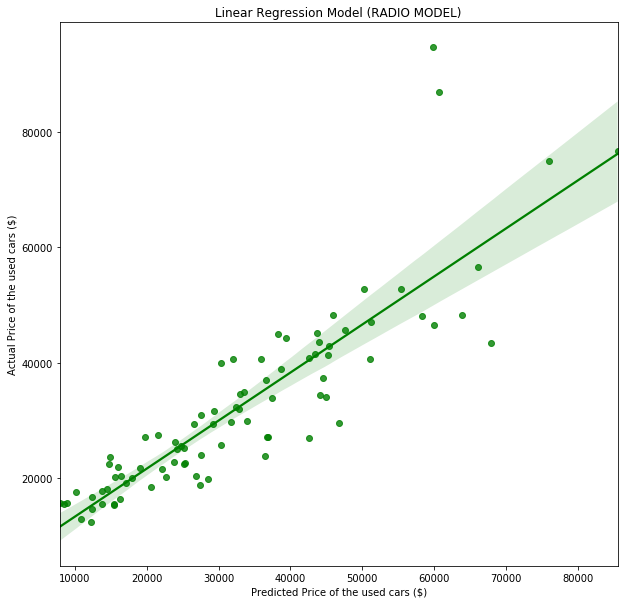

In [108]:
Y_predict_linear = RADIO_MODEL.predict(X_test)
fig, ax = plt.subplots(figsize=(10,10))
fig = sns.regplot(Y_predict_linear, Y_test, color = 'GREEN')
fig.set(title = "Linear Regression Model (RADIO MODEL)", xlabel = "Predicted Price of the used cars ($)", ylabel = "Actual Price of the used cars ($)")

In [101]:
RMSE= float(format(np.sqrt(mean_squared_error(Y_test, Y_predict_linear)), ".3f"))
MSE= mean_squared_error(Y_test, Y_predict_linear)
MAE= mean_absolute_error(Y_test, Y_predict_linear)
r2= r2_score(Y_test, Y_predict_linear)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2) 

RMSE = 8155.734 
MSE = 66515998.71740475 
MAE = 5534.663785253684 
R2 = 0.7357265135782174


[Text(0, 0.5, 'Actual Price of the used cars ($)'),
 Text(0.5, 0, 'Predicted Price of the used cars ($)'),
 Text(0.5, 1.0, 'Random Forest Regression Model (OBIBE MODEL)')]

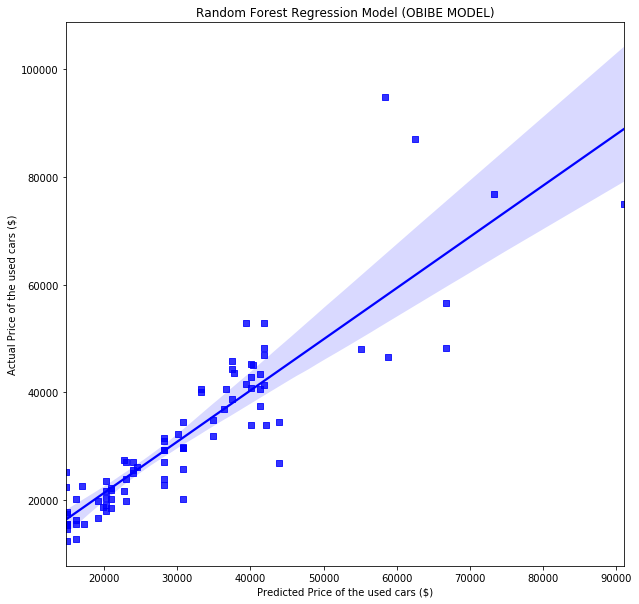

In [105]:
y_predict_RandomForest = OBIBE_MODEL.predict(X_test)
fig, ax = plt.subplots(figsize=(10,10))
fig = sns.regplot(y_predict_RandomForest, Y_test, color = 'blue', marker = "s")
fig.set(title = "Random Forest Regression Model (OBIBE MODEL)", xlabel = "Predicted Price of the used cars ($)", ylabel= "Actual Price of the used cars ($)")

In [106]:
RMSE= float(format(np.sqrt(mean_squared_error(Y_test, y_predict_RandomForest)), ".3f"))
MSE= mean_squared_error(Y_test, y_predict_RandomForest)
MAE= mean_absolute_error(Y_test, y_predict_RandomForest)
r2= r2_score(Y_test, y_predict_RandomForest)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2) 

RMSE = 7340.737 
MSE = 53886418.09482927 
MAE = 4635.366375427398 
R2 = 0.7859048671703084


[Text(0, 0.5, 'Actual Price of the used cars ($)'),
 Text(0.5, 0, 'Predicted Price of the used cars ($)'),
 Text(0.5, 1.0, 'XGBoost Model(DEVIL_EYE_MODEL)')]

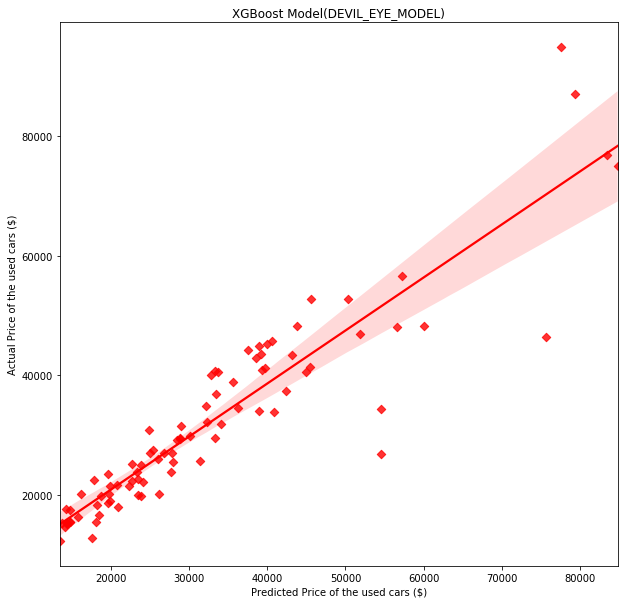

In [110]:
y_predict_XGBoost = DEVIL_EYE_MODEL.predict(X_test)
fig, ax = plt.subplots(figsize=(10,10))
fig = sns.regplot(y_predict_XGBoost, Y_test, color = 'RED', marker = "D")
fig.set(title = "XGBoost Model(DEVIL_EYE_MODEL)", xlabel = "Predicted Price of the used cars ($)", ylabel = "Actual Price of the used cars ($)")

In [111]:
RMSE = float(format(np.sqrt(mean_squared_error(Y_test, y_predict_XGBoost)), ".3f"))
MSE = mean_squared_error(Y_test, y_predict_XGBoost)
MAE = mean_absolute_error(Y_test, y_predict_XGBoost)
r2 = r2_score(Y_test, y_predict_XGBoost)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2) 

RMSE = 6518.433 
MSE = 42489963.51228728 
MAE = 4074.427745730378 
R2 = 0.8311839104599013
